In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [52]:
df= pd.read_csv('Housing_data.csv')

In [53]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [54]:
df.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [55]:
df.duplicated().any()

True

In [56]:
df.shape

(1047, 7)

In [57]:
df[df.duplicated()]

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
72,84291,924,1.0,3,0.91,15,0
124,95708,912,1.5,2,0.16,20,0
135,98389,1184,1.5,2,0.15,18,0
196,104556,1673,2.0,2,0.15,18,0
329,120639,1498,1.5,2,0.18,0,1
364,126082,1592,1.5,3,0.16,18,1
552,155787,1540,1.5,3,0.43,16,0
673,178216,1512,2.0,3,0.77,12,1
839,218184,2655,2.5,4,0.37,1,1
885,233876,2434,2.5,4,1.00,20,1


In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...,...
1042,387652,3504,2.5,5,0.90,0,1
1043,391842,3003,3.5,4,0.46,88,1
1044,394532,3361,3.5,4,0.71,1,1
1045,432845,3250,2.5,3,0.53,23,1


In [60]:
target=df[['Price']]
features= df.drop(columns= 'Price')

In [61]:
target.head()

,Price
0,16858
1,26049
2,26130
3,31113
4,40932


In [62]:
features.head()

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629,1.0,3,0.76,180,0
1,1344,2.0,3,0.92,13,0
2,822,1.0,2,0.56,173,0
3,1540,1.0,2,0.04,115,0
4,1320,1.0,3,0.17,90,0


In [63]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(776, 6)
(259, 6)
(776, 1)
(259, 1)


In [65]:
lin_model= LinearRegression()

In [66]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred= lin_model.predict(x_test)

In [68]:
r2_score(y_test,y_pred)

0.6704394473339745

In [69]:
## Error_Metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [70]:
mae=mean_absolute_error(y_test,y_pred).round(2)
mae

29689.7

In [71]:
mse=mean_squared_error(y_test,y_pred).round(2)
mse

1656720039.22

In [72]:
mape=round(mean_absolute_percentage_error(y_test,y_pred)*100,2)
mape

21.14

In [73]:
rmse= np.sqrt(mse).round(2)
rmse

40702.83

In [74]:
r_squared= r2_score(y_test,y_pred)
r_squared

0.6704394473339745

In [75]:
df.shape

(1035, 7)

In [77]:
features.shape

(1035, 6)

In [78]:
N=1035
k=6

In [79]:
adj_rsquared= 1-((1-r_squared)*(N-1))/(N-k-1)
adj_rsquared

0.668515942162772

<Axes: xlabel='Price'>

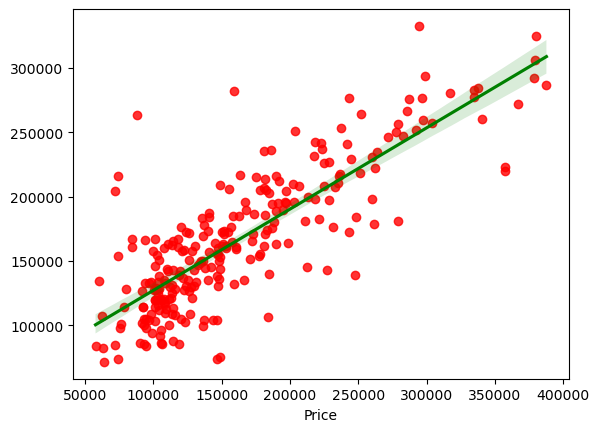

In [82]:
sns.regplot(data=df,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})